# Edge detection:

The follwing code takes an image of specficed width and height and outputs a matrix of ones and zeros corresponding to the image's edges


2 objects were found in this image.


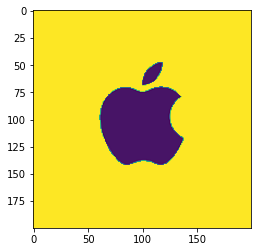

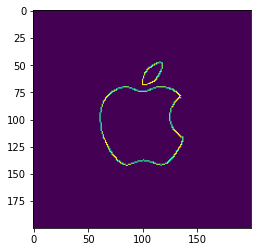

(200, 200)

In [1]:
# import the necessary packages

from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from ipywidgets import interact, IntSlider, Checkbox
import sys

height=200
width=200

image = cv2.imread("apple-logo.png")
image = cv2.resize(image, (height,width)) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray[gray>80]=255
blurred = cv2.GaussianBlur(gray, (3, 3), 220)

edged = cv2.Canny(blurred, 10, 100)

# find the contours in the edged image
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

imgplot = plt.imshow(gray)
plt.show()

imgplot = plt.imshow(edged)
plt.show()
cv2.waitKey(0)
np_img = np.asarray(edged)
np_img[np_img > 0] = 1
np_img.shape

# Line Tracing

The following code takes in the edge matrix "np_image" and outputs the instruction arrays for the two motors


In [2]:
def line_tracer(width, height, np_img):

    motor1= np.zeros(width*height)
    motor2= np.zeros(width*height)
    starting_row=-1
    starting_colm=-1
    found = False
    for i in range(width):
        if(found):
            break
        for j in range(height):

            if (np_img[j][i] >0):
                starting_row=j
                starting_colm=i
                found = True
                break
    temp= np_img.copy()
    index =0
    for i in range(starting_row):
        motor1[index]=1
        motor2[index]=0
        index+=1
    for i in range (starting_colm):
        motor1[index]=0
        motor2[index]=1
        index+=1


    temp[starting_row][starting_colm]=0
    curr_row= starting_row
    curr_colm= starting_colm
    
    
    while ((1 in temp)):

        if(temp[curr_row-1][curr_colm]==1):#move up
            motor1[index]= -1
            motor2[index]=0
            index+=1
            curr_row=curr_row-1
            temp[curr_row][curr_colm]=0
        elif(temp[curr_row][curr_colm+1]==1):#move  right
            motor1[index]= 0
            motor2[index]=1
            index+=1
            curr_row=curr_row
            curr_colm = curr_colm +1
            temp[curr_row][curr_colm]=0
        elif(temp[curr_row+1][curr_colm]==1):#move  down
            motor1[index]= 1
            motor2[index]=0
            index+=1
            curr_row=curr_row+1
            curr_colm = curr_colm
            temp[curr_row][curr_colm]=0
        elif(temp[curr_row][curr_colm-1]==1):#move  left
            motor1[index]= 0
            motor2[index]=-1
            index+=1
            curr_row=curr_row
            curr_colm = curr_colm-1
            temp[curr_row][curr_colm]=0


        elif(temp[curr_row-1][curr_colm+1]==1):#move up right
            motor1[index]= -1
            motor2[index]=1
            index+=1
            curr_row=curr_row-1
            curr_colm = curr_colm +1
            temp[curr_row][curr_colm]=0

        elif(temp[curr_row+1][curr_colm+1]==1):#move  down right
            motor1[index]= 1
            motor2[index]=1
            index+=1
            curr_row=curr_row+1
            curr_colm = curr_colm +1
            temp[curr_row][curr_colm]=0
        elif(temp[curr_row+1][curr_colm-1]==1):#move  down left
            motor1[index]= 1
            motor2[index]=-1
            index+=1
            curr_row=curr_row+1
            curr_colm = curr_colm-1
            temp[curr_row][curr_colm]=0
        elif(temp[curr_row-1][curr_colm-1]==1):#move  up left
            motor1[index]= -1
            motor2[index]=-1
            index+=1
            curr_row=curr_row-1
            curr_colm = curr_colm-1
            temp[curr_row][curr_colm]=0
        else:               #edge got disconnected... Finding next edge
            temp[curr_row][curr_colm]=0
            new_row, new_colm = find_next(temp, curr_row, curr_colm)
            if(new_row>curr_row):
                x=1
            else:
                x=-1
            if(new_colm>curr_colm):
                y=1
            else:
                y=-1
            for i in range(abs(new_row-curr_row)):
                motor1[index]= x
                motor2[index]=0
                index+=1
            for i in range(abs(new_colm-curr_colm)):
                motor1[index]= 0
                motor2[index]=y
                index+=1
            curr_row=new_row
            curr_colm = new_colm
            temp[curr_row][curr_colm]=0
                
            
    #tells the motors to exit after making the cut..        
    while(curr_row != width):
        motor1[index]=1
        motor2[index]=0
        index+=1
        curr_row+=1
    while(curr_colm !=0):
        motor1[index]=0
        motor2[index]=-1
        index+=1
        curr_colm-=1
        
        
    motor1=motor1[0:index]
    motor2=motor2[0:index]
    
    return motor1, motor2

In [3]:
def find_next(temp, curr_row, curr_colm):
    List = list(zip(*np.where(temp == 1)))
    min_distance=10000
    new_row=-1
    new_colm=-1
    for i in List:
        distance= abs(curr_row - i[0])+abs(curr_colm - i[1])
        if (distance <min_distance):
            min_distance=distance
            new_row = i[0]
            new_colm= i[1]
    return new_row, new_colm

In [4]:
line_tracer(200, 200, np_img)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.